In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime

In [78]:
exec(open("../../header.py").read())

# Import data

In [79]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

# Fit model

In [80]:
# fit RF
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X, y['Biopsy'])

RandomForestClassifier(n_estimators=500)

# Use class

In [157]:
exec(open("../../header.py").read())

In [163]:
ice = ICE("binary", num_per_ob = 50, trace = False)

In [164]:
ice.fit_single_feature(X, rf, "Age")

Fit Age in 1 seconds


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Age ICE Plot'}, xlabel='Age', ylabel='Predicted Probability'>)

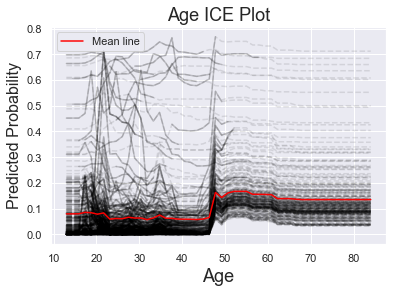

In [165]:
ice.ice_plot_single_feature('Age')

In [161]:
ice.fit(X, rf)

Fit Age in 1 seconds
Fit Number of sexual partners in 1 seconds
Fit First sexual intercourse in 1 seconds
Fit Num of pregnancies in 1 seconds
Fit Smokes in 1 seconds
Fit Smokes (years) in 1 seconds
Fit Smokes (packs/year) in 1 seconds
Fit Hormonal Contraceptives in 1 seconds
Fit Hormonal Contraceptives (years) in 1 seconds
Fit IUD in 1 seconds
Fit IUD (years) in 1 seconds
Fit STDs in 1 seconds
Fit STDs (number) in 1 seconds
Fit STDs:condylomatosis in 1 seconds
Fit STDs:cervical condylomatosis in 1 seconds
Fit STDs:vaginal condylomatosis in 1 seconds
Fit STDs:vulvo-perineal condylomatosis in 1 seconds
Fit STDs:syphilis in 1 seconds
Fit STDs:pelvic inflammatory disease in 1 seconds
Fit STDs:genital herpes in 1 seconds
Fit STDs:molluscum contagiosum in 1 seconds
Fit STDs:AIDS in 1 seconds
Fit STDs:HIV in 1 seconds
Fit STDs:Hepatitis B in 1 seconds
Fit STDs:HPV in 1 seconds
Fit STDs: Number of diagnosis in 1 seconds
Fit STDs: Time since first diagnosis in 1 seconds
Fit STDs: Time since las

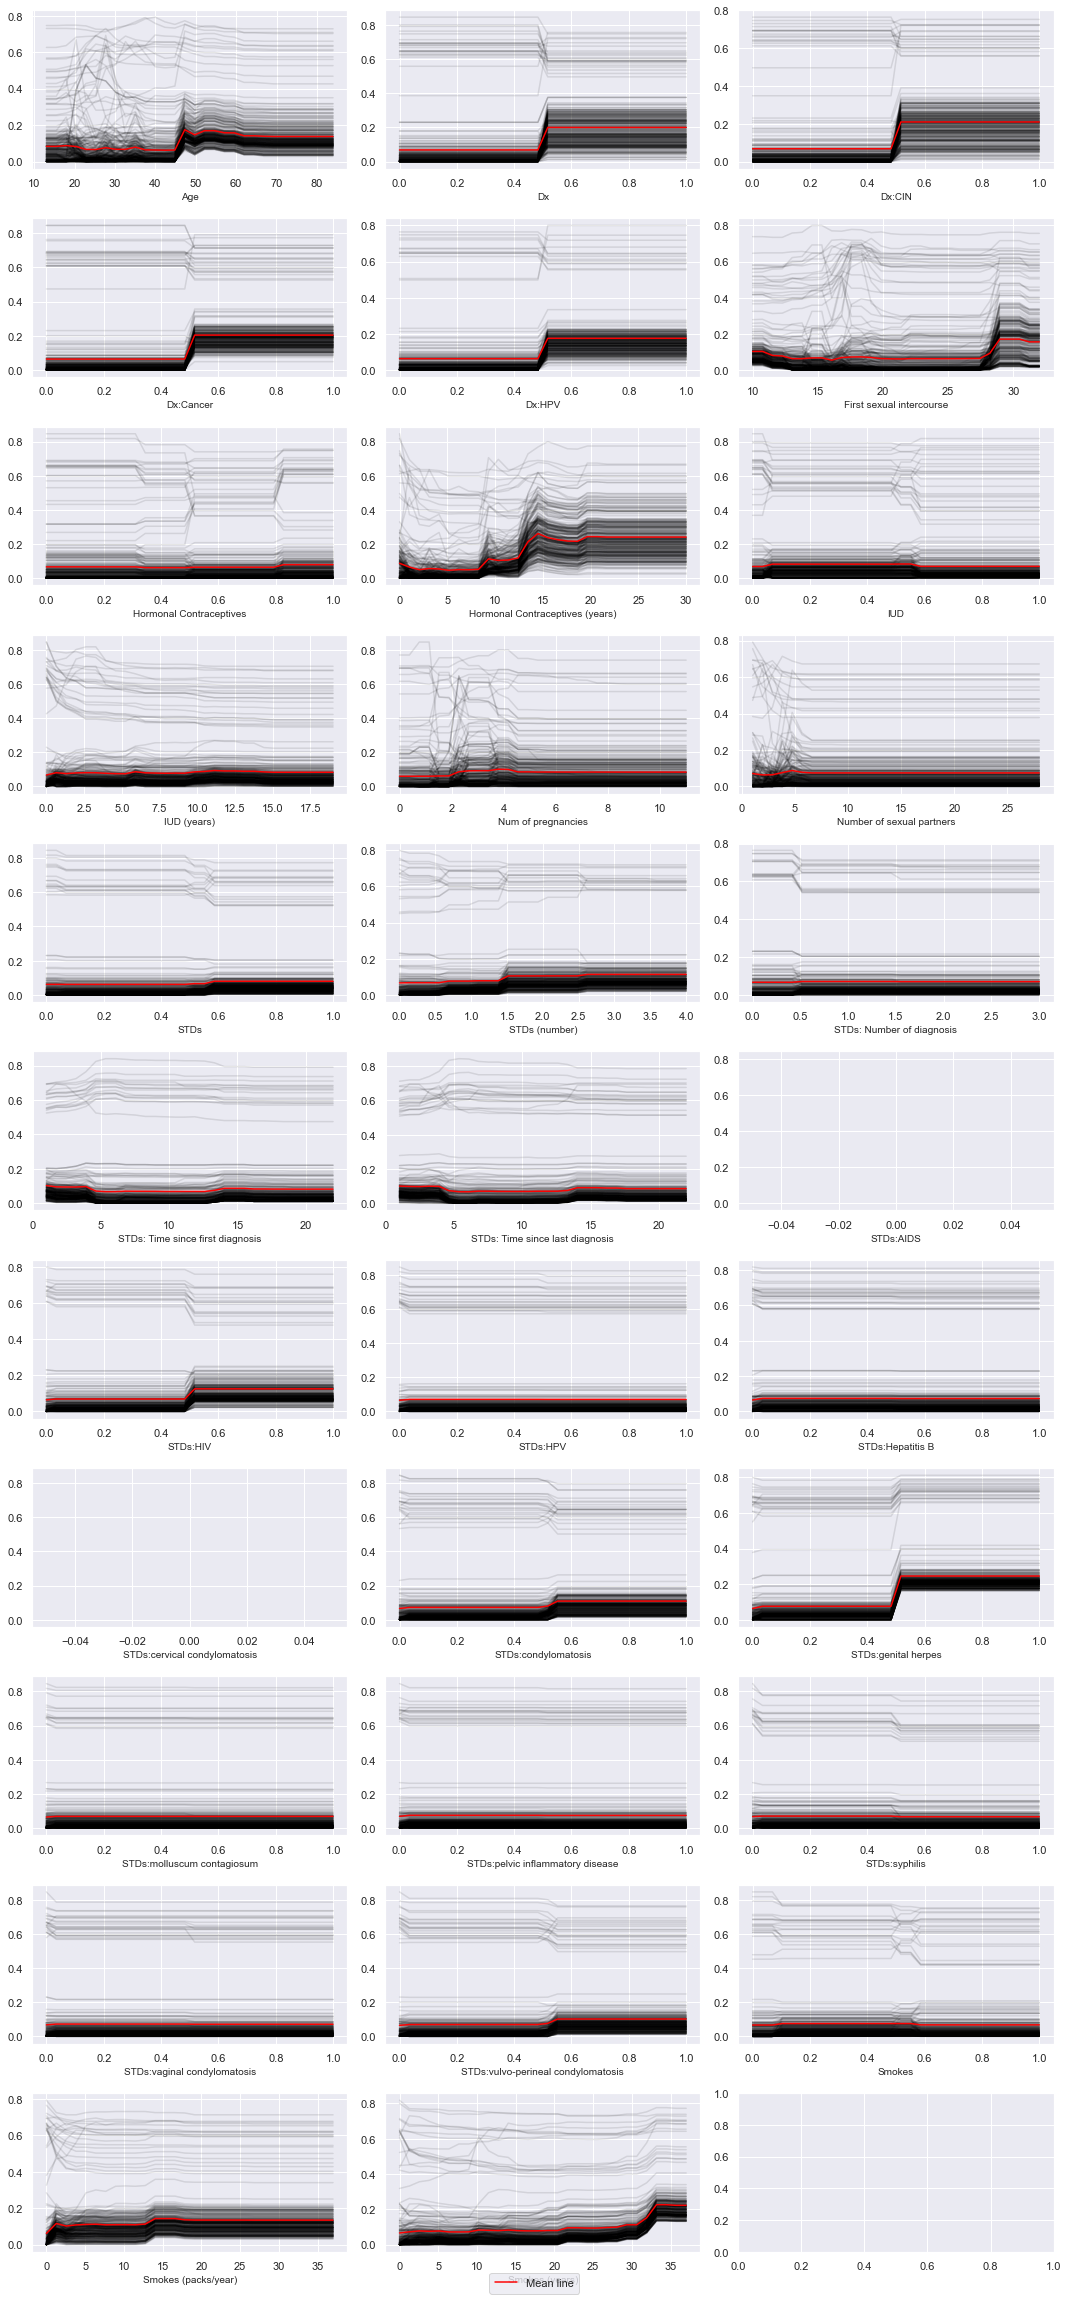

In [162]:
ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))

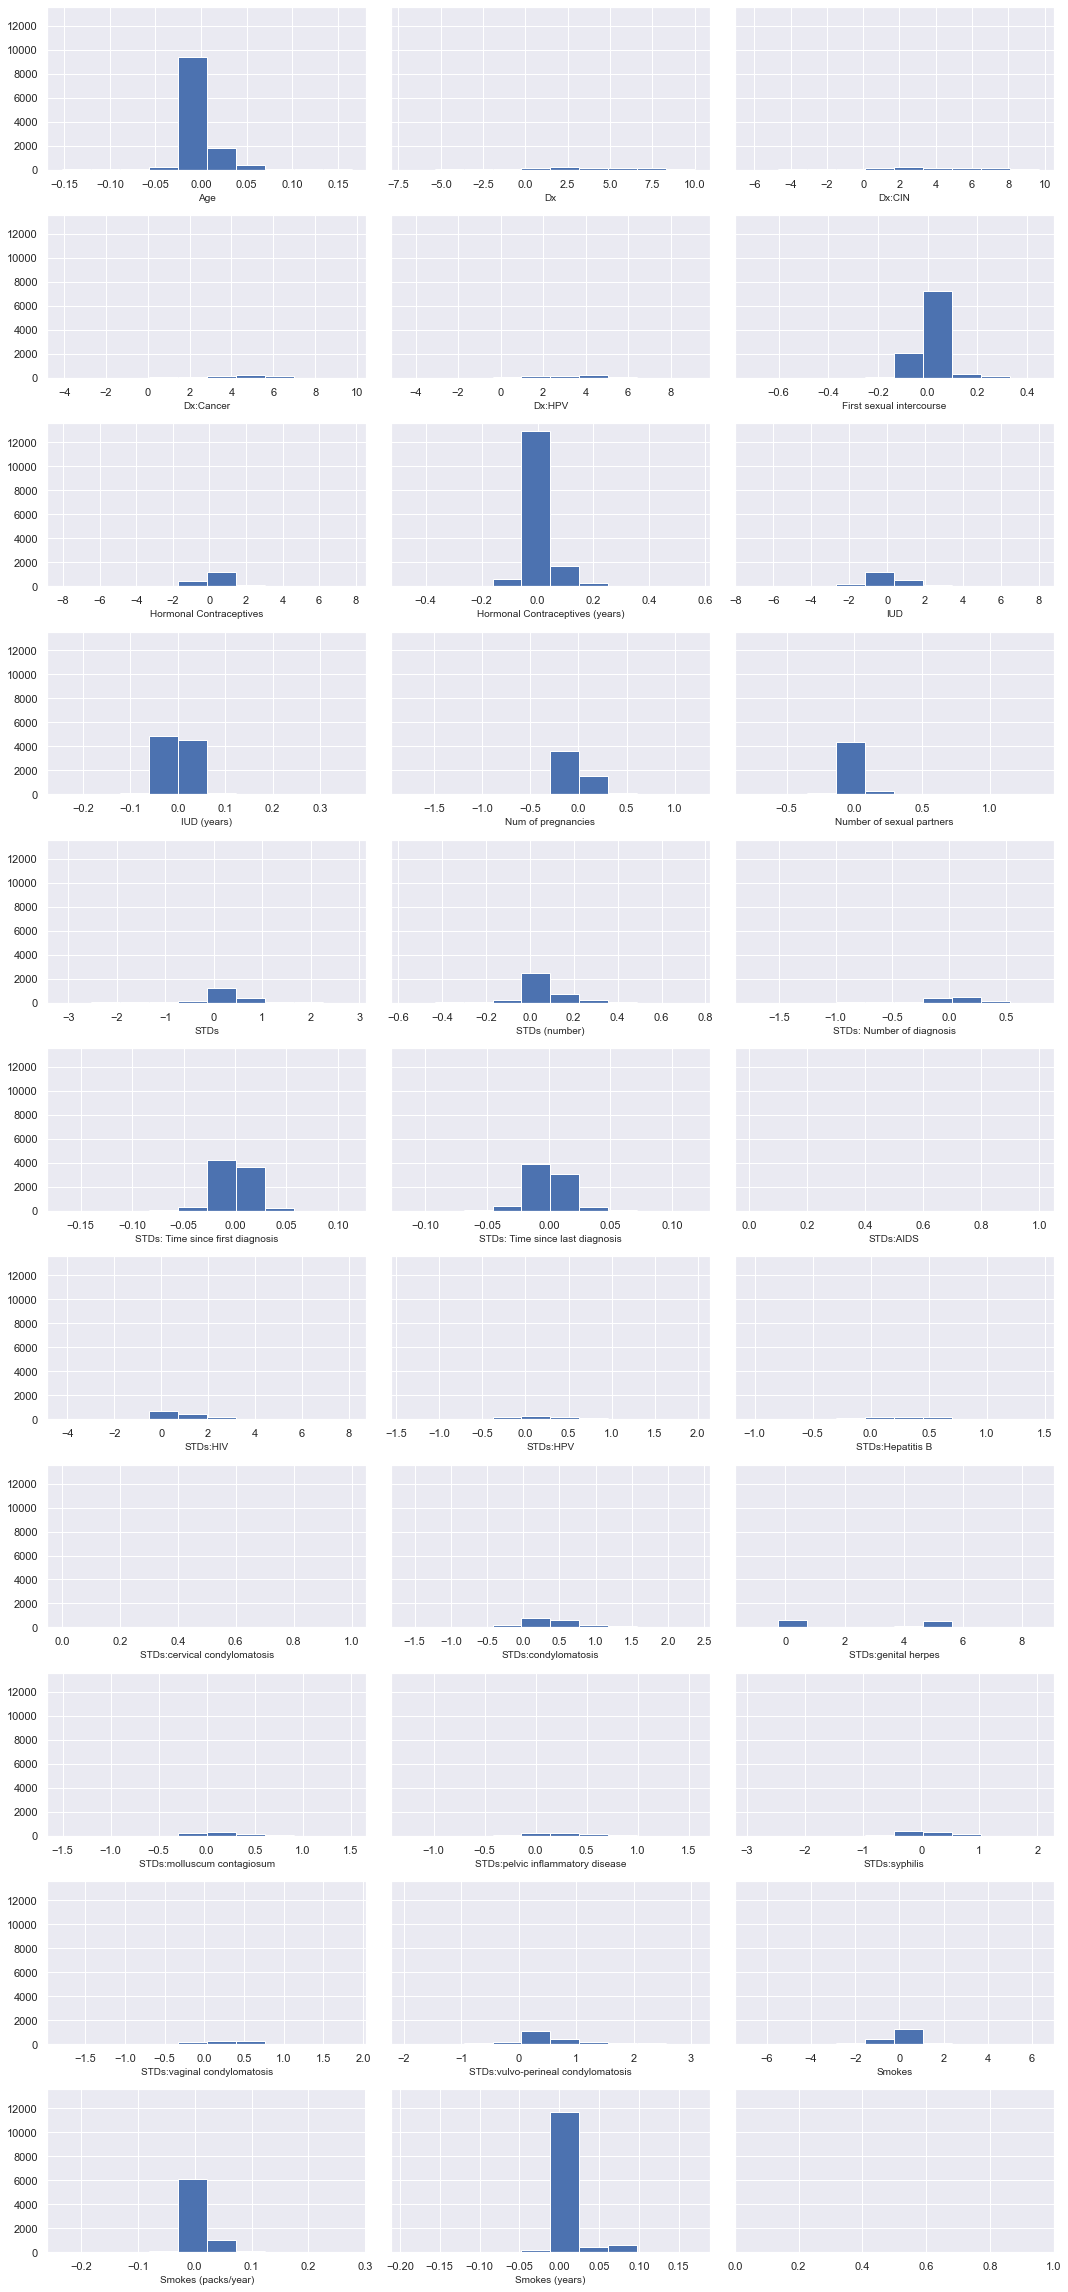

In [27]:
ice.feature_importance_hist(results_root("ice-plot-from-class/all_histograms.pdf"))

In [45]:
b = pd.DataFrame({'Feature':X.columns, 
              'RF FI':rf.feature_importances_*100})\
    .round(3)

In [46]:
a = ice.feature_importance_table()\
    .drop(['Normalized Mean'], axis = 1)\
    .rename({'Normalized Absolute Mean':'Norm Mean Abs',
             'Feature Importance':'FI'}, axis = 1)\
    .round(3)\
    .merge(b, how = "inner", on = "Feature")\
    .sort_values('FI', ascending = False)\
    .to_latex()

print(a)

\begin{tabular}{llrrrrrr}
\toprule
{} &                             Feature &   Mean &  Mean Abs &  St. Dev. &  Norm Mean Abs &      FI &   RF FI \\
\midrule
7  &     Hormonal Contraceptives (years) &  0.007 &     0.019 &     0.040 &          0.126 &  13.278 &  14.886 \\
0  &                                 Age &  0.001 &     0.005 &     0.012 &          0.101 &  10.701 &  17.790 \\
5  &            First sexual intercourse &  0.003 &     0.014 &     0.040 &          0.079 &   8.289 &  12.803 \\
31 &                      Smokes (years) &  0.004 &     0.006 &     0.015 &          0.069 &   7.320 &   4.223 \\
23 &                 STDs:genital herpes &  0.171 &     0.174 &     0.883 &          0.052 &   5.467 &   0.955 \\
10 &                  Num of pregnancies &  0.002 &     0.014 &     0.061 &          0.046 &   4.883 &  10.244 \\
3  &                           Dx:Cancer &  0.139 &     0.146 &     0.837 &          0.044 &   4.590 &   1.646 \\
1  &                                  Dx &  